# CS235 Fall 2024 Course Project

Student 1 - Name: Ashok Kumar J (862467018)

Student 2 - Name: Dan Shay (862546326)


## Introduction
In this project, a number of data
mining techniques that we cover in this class will be implemented and applied to a real-world imbalanced
dataset.

**Dataset:** Wisconsin Breast Cancer Diagnostic dataset from the UCI data repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Setup

1. Create new python environment for the project

- This is not necessary on Google Colab but a good practice on your local machine

2. Install the required packages

In [2]:
!pip install ucimlrepo

## Imports

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

## Load Data

In [4]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

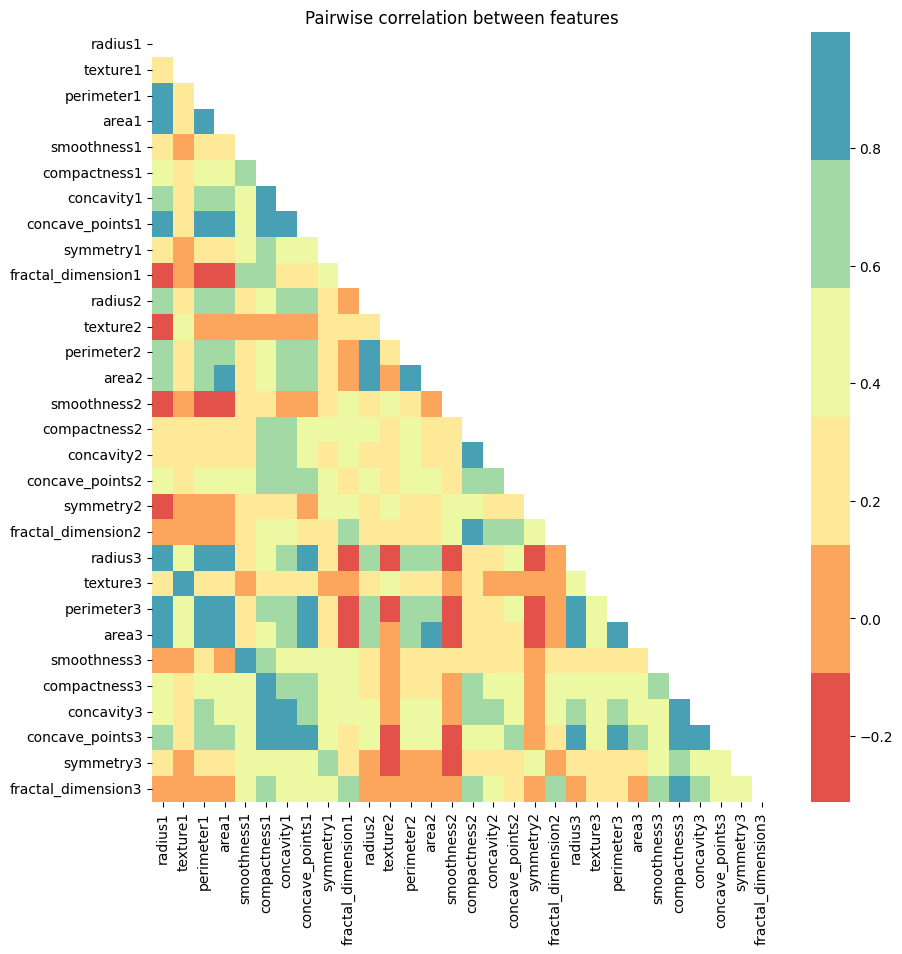

In [5]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

### Class-wise counts

In [6]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions

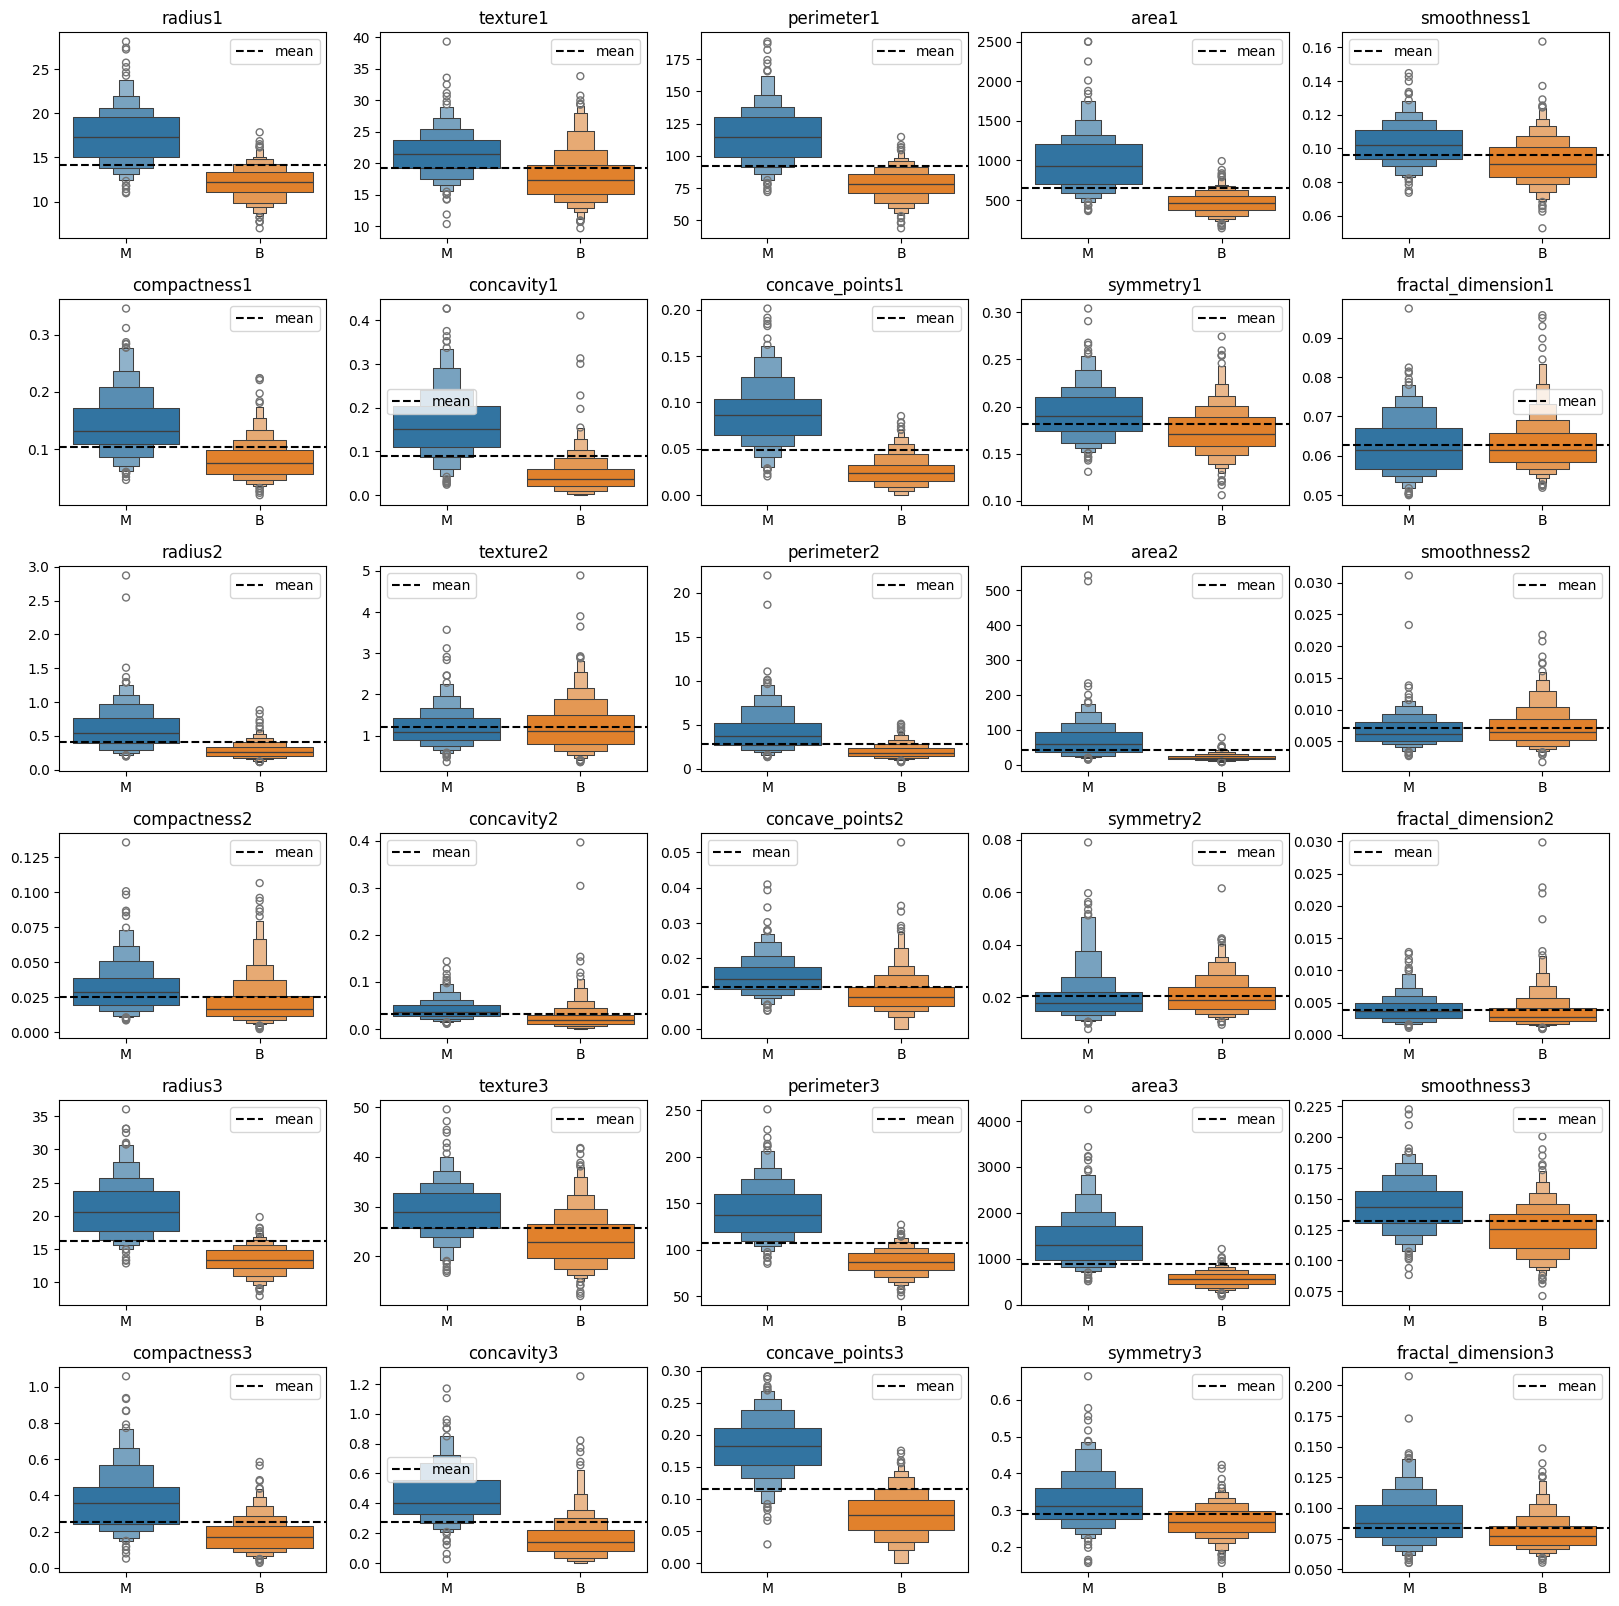

In [7]:
plt.figure(figsize=(20,20))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(6,5,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.ylabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 1 - Supervised Techniques

## Q1 - Implementing simple classifiers

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

In [11]:
# imports

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Function to evaluate the classifier using 10-fold cross-validation
def evaluate_model(model, X, y):
    skf = StratifiedKFold(n_splits=10)
    f1_scores = []

    # Perform stratified cross-validation
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        f1_scores.append(f1_score(y_test, predictions, pos_label='M'))

    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    return mean_f1, std_f1

In [13]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Evaluate the Decision Tree classifier
f1_mean_dt, f1_std_dt = evaluate_model(decision_tree, X, y['Diagnosis'])

# Print the results for Decision Tree
print(f"Decision Tree F1 Score: {f1_mean_dt:.4f} ± {f1_std_dt:.4f}")


Decision Tree F1 Score: 0.9120 ± 0.0431


In [14]:
# Initialize the Naive Bayes Classifier
naive_bayes = GaussianNB()

# Evaluate the Naive Bayes classifier
f1_mean_nb, f1_std_nb = evaluate_model(naive_bayes, X, y['Diagnosis'])

# Print the results for Naive Bayes
print(f"Naive Bayes F1 Score: {f1_mean_nb:.4f} ± {f1_std_nb:.4f}")

Naive Bayes F1 Score: 0.9122 ± 0.0404


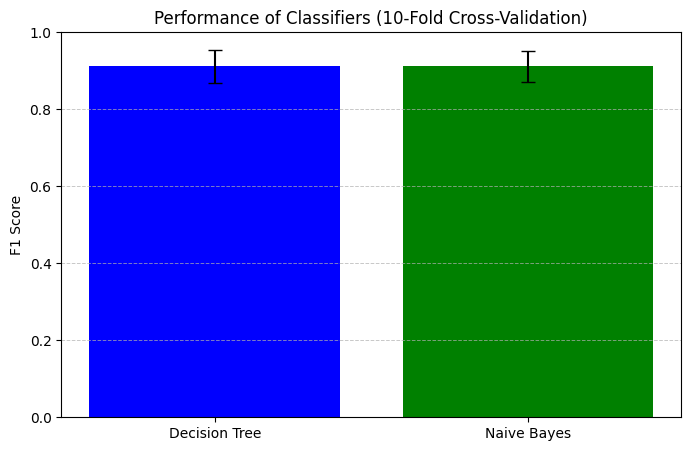

In [15]:
# Create a bar chart to compare the F1 scores of both classifiers
plt.figure(figsize=(8, 5))
plt.bar(['Decision Tree', 'Naive Bayes'], [f1_mean_dt, f1_mean_nb], 
        yerr=[f1_std_dt, f1_std_nb], capsize=5, color=['blue', 'green'])
plt.ylabel('F1 Score')
plt.title('Performance of Classifiers (10-Fold Cross-Validation)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

## Q2 - Dimensionality reduction with the Singular Value Decomposition

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

## Q3 - Feature selection with randomization

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

## Q4 - Data augmentation using SMOTE

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

# Phase 2 - Unsupervised Techniques

## Q1 - k-Means clustering

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

## Q2 - Density-based clustering with DBSCAN

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

## Q3 - Graph-based clustering with Spectral Clustering

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

## Q4 - Anomaly detection with the Isolation Forest

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

# References / Disclosures

[Add your references / disclosures for your implementations here]